In [29]:
"""Creating word2vec type of algorithm from scratch."""

__author__ = 'simone carolini'

import numpy as np
import os
from scipy import sparse
from typing import Type, List, Union, Dict
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

from utils.util import text_processing
from utils.util import unit_test_true


# todo! this is just a test corpus.
text_corpus = ['simone carolini is a man, simona carolini is a woman, he is a man, he is a boy, girl is a woman',
               'transferwise is a company. transferwise is not a man. transferwise is not a woman']


def create_context_values(input_corpus: Type[List] = None, window_length: int = 2) -> Type[Union[List, List]]:
    corpus_processed, words_list = [], []
    for text in input_corpus:
        text = text_processing(text)  # Clean the text.
        corpus_processed.append(text)  # Append words.
        # Context words.
        for i, word in enumerate(text):
            for w in range(window_length):
                # Ahead of focus word.
                if i + 1 + w < len(text):
                    words_list.append([word] + [text[(i + 1 + w)]])
                if i - 1 - w >= 0:
                    words_list.append([word] + [text[(i - 1 - w)]])
    return corpus_processed, words_list


def create_word_index(corpus_processed: Type[List]) -> Type[Dict]:
    """
    Create a dictionary with word and its index.

    :param
    ------
    corpus_processed : list
        List with all the words.

    :return:

    """

    tmp_words = []
    for sentence in corpus_processed:
        tmp_words += sentence  # It is the same as using .extend function in pandas.
    words = list(set(tmp_words))
    words.sort(reverse=False)
    word_index = {w: i for i, w in enumerate(words)}
    return word_index


def plot_word2vec_representation(embeddings_dict: Type[Dict], w: Type[List]):
    x_1 = [i[0] for i in embeddings_dict.values()]
    x_2 = [i[1] for i in embeddings_dict.values()]

    ax = sns.scatterplot(x=x_1, y=x_2)

    for w, x, y in zip(w, x_1, x_2):
        ax.text(x+.02, y, w)


if __name__ == '__main__':
    corpus, word_lists = create_context_values(text_corpus)
    word_index = create_word_index(corpus)
    n_words = len(word_index)  # features/columns in your matrix.
    print(f'number of unique words: ', n_words)

    X, Y = [], []
    for i, word_list in enumerate(word_lists):
        main_word_index = word_index.get(word_list[0])  # Get the index of your focus word.
        context_word_index = word_index.get(word_list[1])  # Get the index of the context word

        # Define the 1 x n array. n = number of features. X will contain focus words, Y will contain context words.
        X_row = np.zeros(n_words)
        Y_row = np.zeros(n_words)
        # Replace with 1 the words that are present.
        X_row[main_word_index] = 1
        Y_row[context_word_index] = 1
        X.append(X_row)
        Y.append(Y_row)

    # Store as spare matrices:
    # https://towardsdatascience.com/why-we-use-sparse-matrices-for-recommender-systems-2ccc9ab698a4
    # In jupyter notebook you may have to use np.asarray(X) etc.
    X = np.asarray(X)
    Y = np.asarray(Y)

    unit_test_true(X, Y)  # Check that the two matrices are the same length.

    embeddings_size = 2
    os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'  # Odd issue with my env: https://github.com/openai/spinningup/issues/16

    # Deep Learning phase.
    focus_m = Input(shape=(X.shape[1],))
    context_m = Dense(units=embeddings_size, activation='linear')(focus_m)
    context_m = Dense(units=Y.shape[1], activation='softmax')(context_m)
    model = Model(inputs=focus_m, outputs=context_m)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    model.fit(x=X, y=Y, batch_size=256, epochs=1000)
    weights = model.get_weights()[0]  # Weights from neural network.
    print(weights)

    # Associate words to embeddings/weights.
    words = list(word_index.keys())  # transform dict to list.
    embeddings_dict = dict()
    for word in words:
        embeddings_dict.update({word: weights[word_index.get(word)]})
    # word - [[embedding, embedding]]
    print(embeddings_dict)

number of unique words:  9
Train on 52 samples
Epoch 1/1000
52/52 [==============================] - 1s 16ms/sample - loss: 2.2166
Epoch 2/1000
52/52 [==============================] - 0s 29us/sample - loss: 2.2153
Epoch 3/1000
52/52 [==============================] - 0s 54us/sample - loss: 2.2141
Epoch 4/1000
52/52 [==============================] - 0s 54us/sample - loss: 2.2129
Epoch 5/1000
52/52 [==============================] - 0s 34us/sample - loss: 2.2117
Epoch 6/1000
52/52 [==============================] - 0s 31us/sample - loss: 2.2105
Epoch 7/1000
52/52 [==============================] - 0s 34us/sample - loss: 2.2093
Epoch 8/1000
52/52 [==============================] - 0s 33us/sample - loss: 2.2081
Epoch 9/1000
52/52 [==============================] - 0s 48us/sample - loss: 2.2069
Epoch 10/1000
52/52 [==============================] - 0s 43us/sample - loss: 2.2057
Epoch 11/1000
52/52 [==============================] - 0s 65us/sample - loss: 2.2045
Epoch 12/1000
52/52 [======

Epoch 97/1000
52/52 [==============================] - 0s 98us/sample - loss: 2.1137
Epoch 98/1000
52/52 [==============================] - 0s 44us/sample - loss: 2.1128
Epoch 99/1000
52/52 [==============================] - 0s 39us/sample - loss: 2.1118
Epoch 100/1000
52/52 [==============================] - 0s 32us/sample - loss: 2.1109
Epoch 101/1000
52/52 [==============================] - 0s 31us/sample - loss: 2.1099
Epoch 102/1000
52/52 [==============================] - 0s 34us/sample - loss: 2.1090
Epoch 103/1000
52/52 [==============================] - 0s 59us/sample - loss: 2.1080
Epoch 104/1000
52/52 [==============================] - 0s 40us/sample - loss: 2.1071
Epoch 105/1000
52/52 [==============================] - 0s 39us/sample - loss: 2.1061
Epoch 106/1000
52/52 [==============================] - 0s 67us/sample - loss: 2.1052
Epoch 107/1000
52/52 [==============================] - 0s 74us/sample - loss: 2.1042
Epoch 108/1000
52/52 [==============================] - 0

Epoch 193/1000
52/52 [==============================] - 0s 42us/sample - loss: 2.0287
Epoch 194/1000
52/52 [==============================] - 0s 39us/sample - loss: 2.0279
Epoch 195/1000
52/52 [==============================] - 0s 38us/sample - loss: 2.0271
Epoch 196/1000
52/52 [==============================] - 0s 34us/sample - loss: 2.0263
Epoch 197/1000
52/52 [==============================] - 0s 41us/sample - loss: 2.0255
Epoch 198/1000
52/52 [==============================] - 0s 47us/sample - loss: 2.0247
Epoch 199/1000
52/52 [==============================] - 0s 31us/sample - loss: 2.0239
Epoch 200/1000
52/52 [==============================] - 0s 28us/sample - loss: 2.0232
Epoch 201/1000
52/52 [==============================] - 0s 26us/sample - loss: 2.0224
Epoch 202/1000
52/52 [==============================] - 0s 31us/sample - loss: 2.0216
Epoch 203/1000
52/52 [==============================] - 0s 42us/sample - loss: 2.0208
Epoch 204/1000
52/52 [==============================] 

Epoch 289/1000
52/52 [==============================] - 0s 34us/sample - loss: 1.9607
Epoch 290/1000
52/52 [==============================] - 0s 60us/sample - loss: 1.9601
Epoch 291/1000
52/52 [==============================] - 0s 42us/sample - loss: 1.9595
Epoch 292/1000
52/52 [==============================] - 0s 42us/sample - loss: 1.9589
Epoch 293/1000
52/52 [==============================] - 0s 34us/sample - loss: 1.9583
Epoch 294/1000
52/52 [==============================] - 0s 47us/sample - loss: 1.9577
Epoch 295/1000
52/52 [==============================] - 0s 40us/sample - loss: 1.9571
Epoch 296/1000
52/52 [==============================] - 0s 53us/sample - loss: 1.9565
Epoch 297/1000
52/52 [==============================] - 0s 35us/sample - loss: 1.9559
Epoch 298/1000
52/52 [==============================] - 0s 42us/sample - loss: 1.9553
Epoch 299/1000
52/52 [==============================] - 0s 55us/sample - loss: 1.9547
Epoch 300/1000
52/52 [==============================] 

Epoch 385/1000
52/52 [==============================] - 0s 48us/sample - loss: 1.9095
Epoch 386/1000
52/52 [==============================] - 0s 54us/sample - loss: 1.9090
Epoch 387/1000
52/52 [==============================] - 0s 34us/sample - loss: 1.9086
Epoch 388/1000
52/52 [==============================] - 0s 69us/sample - loss: 1.9081
Epoch 389/1000
52/52 [==============================] - 0s 37us/sample - loss: 1.9076
Epoch 390/1000
52/52 [==============================] - 0s 78us/sample - loss: 1.9072
Epoch 391/1000
52/52 [==============================] - 0s 51us/sample - loss: 1.9067
Epoch 392/1000
52/52 [==============================] - 0s 50us/sample - loss: 1.9062
Epoch 393/1000
52/52 [==============================] - 0s 67us/sample - loss: 1.9058
Epoch 394/1000
52/52 [==============================] - 0s 41us/sample - loss: 1.9053
Epoch 395/1000
52/52 [==============================] - 0s 41us/sample - loss: 1.9049
Epoch 396/1000
52/52 [==============================] 

Epoch 481/1000
52/52 [==============================] - 0s 61us/sample - loss: 1.8693
Epoch 482/1000
52/52 [==============================] - 0s 60us/sample - loss: 1.8689
Epoch 483/1000
52/52 [==============================] - 0s 45us/sample - loss: 1.8685
Epoch 484/1000
52/52 [==============================] - 0s 35us/sample - loss: 1.8682
Epoch 485/1000
52/52 [==============================] - 0s 50us/sample - loss: 1.8678
Epoch 486/1000
52/52 [==============================] - 0s 48us/sample - loss: 1.8674
Epoch 487/1000
52/52 [==============================] - 0s 28us/sample - loss: 1.8670
Epoch 488/1000
52/52 [==============================] - 0s 30us/sample - loss: 1.8667
Epoch 489/1000
52/52 [==============================] - 0s 56us/sample - loss: 1.8663
Epoch 490/1000
52/52 [==============================] - 0s 49us/sample - loss: 1.8659
Epoch 491/1000
52/52 [==============================] - 0s 69us/sample - loss: 1.8655
Epoch 492/1000
52/52 [==============================] 

Epoch 577/1000
52/52 [==============================] - 0s 34us/sample - loss: 1.8362
Epoch 578/1000
52/52 [==============================] - 0s 43us/sample - loss: 1.8358
Epoch 579/1000
52/52 [==============================] - 0s 41us/sample - loss: 1.8355
Epoch 580/1000
52/52 [==============================] - 0s 51us/sample - loss: 1.8352
Epoch 581/1000
52/52 [==============================] - 0s 32us/sample - loss: 1.8349
Epoch 582/1000
52/52 [==============================] - 0s 27us/sample - loss: 1.8346
Epoch 583/1000
52/52 [==============================] - 0s 34us/sample - loss: 1.8343
Epoch 584/1000
52/52 [==============================] - 0s 60us/sample - loss: 1.8340
Epoch 585/1000
52/52 [==============================] - 0s 40us/sample - loss: 1.8337
Epoch 586/1000
52/52 [==============================] - 0s 32us/sample - loss: 1.8333
Epoch 587/1000
52/52 [==============================] - 0s 30us/sample - loss: 1.8330
Epoch 588/1000
52/52 [==============================] 

Epoch 673/1000
52/52 [==============================] - 0s 43us/sample - loss: 1.8082
Epoch 674/1000
52/52 [==============================] - 0s 44us/sample - loss: 1.8080
Epoch 675/1000
52/52 [==============================] - 0s 34us/sample - loss: 1.8077
Epoch 676/1000
52/52 [==============================] - 0s 32us/sample - loss: 1.8074
Epoch 677/1000
52/52 [==============================] - 0s 40us/sample - loss: 1.8072
Epoch 678/1000
52/52 [==============================] - 0s 33us/sample - loss: 1.8069
Epoch 679/1000
52/52 [==============================] - 0s 39us/sample - loss: 1.8066
Epoch 680/1000
52/52 [==============================] - 0s 30us/sample - loss: 1.8064
Epoch 681/1000
52/52 [==============================] - 0s 46us/sample - loss: 1.8061
Epoch 682/1000
52/52 [==============================] - 0s 44us/sample - loss: 1.8058
Epoch 683/1000
52/52 [==============================] - 0s 41us/sample - loss: 1.8056
Epoch 684/1000
52/52 [==============================] 

Epoch 769/1000
52/52 [==============================] - 0s 37us/sample - loss: 1.7842
Epoch 770/1000
52/52 [==============================] - 0s 35us/sample - loss: 1.7840
Epoch 771/1000
52/52 [==============================] - 0s 38us/sample - loss: 1.7838
Epoch 772/1000
52/52 [==============================] - 0s 47us/sample - loss: 1.7835
Epoch 773/1000
52/52 [==============================] - 0s 58us/sample - loss: 1.7833
Epoch 774/1000
52/52 [==============================] - 0s 43us/sample - loss: 1.7831
Epoch 775/1000
52/52 [==============================] - 0s 34us/sample - loss: 1.7828
Epoch 776/1000
52/52 [==============================] - 0s 26us/sample - loss: 1.7826
Epoch 777/1000
52/52 [==============================] - 0s 41us/sample - loss: 1.7824
Epoch 778/1000
52/52 [==============================] - 0s 45us/sample - loss: 1.7821
Epoch 779/1000
52/52 [==============================] - 0s 51us/sample - loss: 1.7819
Epoch 780/1000
52/52 [==============================] 

Epoch 865/1000
52/52 [==============================] - 0s 33us/sample - loss: 1.7631
Epoch 866/1000
52/52 [==============================] - 0s 25us/sample - loss: 1.7629
Epoch 867/1000
52/52 [==============================] - 0s 37us/sample - loss: 1.7627
Epoch 868/1000
52/52 [==============================] - 0s 44us/sample - loss: 1.7625
Epoch 869/1000
52/52 [==============================] - 0s 34us/sample - loss: 1.7623
Epoch 870/1000
52/52 [==============================] - 0s 37us/sample - loss: 1.7621
Epoch 871/1000
52/52 [==============================] - 0s 26us/sample - loss: 1.7619
Epoch 872/1000
52/52 [==============================] - 0s 42us/sample - loss: 1.7617
Epoch 873/1000
52/52 [==============================] - 0s 38us/sample - loss: 1.7615
Epoch 874/1000
52/52 [==============================] - 0s 41us/sample - loss: 1.7613
Epoch 875/1000
52/52 [==============================] - 0s 40us/sample - loss: 1.7611
Epoch 876/1000
52/52 [==============================] 

Epoch 961/1000
52/52 [==============================] - 0s 58us/sample - loss: 1.7444
Epoch 962/1000
52/52 [==============================] - 0s 36us/sample - loss: 1.7443
Epoch 963/1000
52/52 [==============================] - 0s 38us/sample - loss: 1.7441
Epoch 964/1000
52/52 [==============================] - 0s 50us/sample - loss: 1.7439
Epoch 965/1000
52/52 [==============================] - 0s 38us/sample - loss: 1.7437
Epoch 966/1000
52/52 [==============================] - 0s 42us/sample - loss: 1.7435
Epoch 967/1000
52/52 [==============================] - 0s 57us/sample - loss: 1.7433
Epoch 968/1000
52/52 [==============================] - 0s 47us/sample - loss: 1.7432
Epoch 969/1000
52/52 [==============================] - 0s 38us/sample - loss: 1.7430
Epoch 970/1000
52/52 [==============================] - 0s 32us/sample - loss: 1.7428
Epoch 971/1000
52/52 [==============================] - 0s 35us/sample - loss: 1.7426
Epoch 972/1000
52/52 [==============================] 

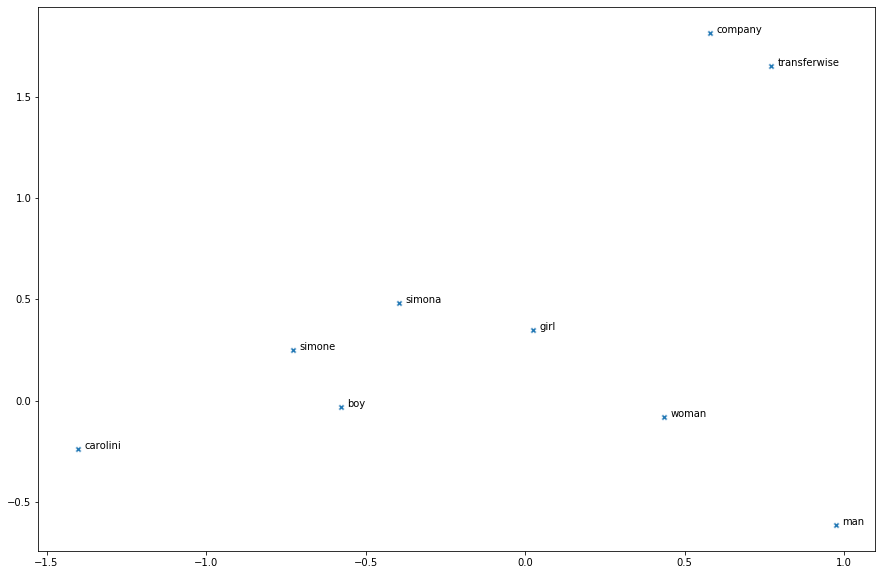

In [32]:
def plot_word2vec_representation(embeddings_dict: Type[Dict], words: Type[List]):
    x_1 = [i[0] for i in embeddings_dict.values()]
    x_2 = [i[1] for i in embeddings_dict.values()]

    fig, ax = plt.subplots(figsize=(15,10))
    sns.scatterplot(x=x_1, y=x_2, ax=ax, marker='X')

    for word, x, y in zip(words, x_1, x_2):
        ax.text(x+.02, y, word)

plot_word2vec_representation(embeddings_dict, words)